In [1]:
import os, argparse
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.backends.cudnn as cudnn
import torchvision

import datasets
# from utils import select_device, natural_keys, gazeto3d, angular, getArch
from utils import select_device, natural_keys, gazeto3d, angular, getArch
from model import L2CS

In [2]:
# check if we have the correct number of checkpoint files 
ppath ='/project/results/soutput/snapshots/' 
for fold in range(15):
    foldstr = f"fold{fold:0>2}"
    cpath =os.path.join(ppath, foldstr)
    files = os.listdir(cpath)
    print(len(files), end=" ")

61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 

In [ ]:
def parse_args():
    """Parse input arguments."""
    parser = argparse.ArgumentParser(
        description='Gaze estimation using L2CSNet .')
     # Gaze360
    parser.add_argument(
        '--gaze360image_dir', dest='gaze360image_dir', help='Directory path for gaze images.',
        default='datasets/Gaze360/Image', type=str)
    parser.add_argument(
        '--gaze360label_dir', dest='gaze360label_dir', help='Directory path for gaze labels.',
        default='datasets/Gaze360/Label/test.label', type=str)
    # mpiigaze
    parser.add_argument(
        '--gazeMpiimage_dir', dest='gazeMpiimage_dir', help='Directory path for gaze images.',
        default='datasets/MPIIFaceGaze/Image', type=str)
    parser.add_argument(
        '--gazeMpiilabel_dir', dest='gazeMpiilabel_dir', help='Directory path for gaze labels.',
        default='datasets/MPIIFaceGaze/Label', type=str)
    # Important args -------------------------------------------------------------------------------------------------------
    # ----------------------------------------------------------------------------------------------------------------------
    parser.add_argument(
        '--dataset', dest='dataset', help='gaze360, mpiigaze',
        default= "gaze360", type=str)
    parser.add_argument(
        '--snapshot', dest='snapshot', help='Path to the folder contains models.', 
        default='output/snapshots/L2CS-gaze360-_loader-180-4-lr', type=str)
    parser.add_argument(
        '--evalpath', dest='evalpath', help='path for the output evaluating gaze test.',
        default="evaluation/L2CS-gaze360-_loader-180-4-lr", type=str)
    parser.add_argument(
        '--gpu',dest='gpu_id', help='GPU device id to use [0]',
        default="0", type=str)
    parser.add_argument(
        '--batch_size', dest='batch_size', help='Batch size.',
        default=100, type=int)
    parser.add_argument(
        '--arch', dest='arch', help='Network architecture, can be: ResNet18, ResNet34, [ResNet50], ''ResNet101, ResNet152, Squeezenet_1_0, Squeezenet_1_1, MobileNetV2',
        default='ResNet50', type=str)
    # ---------------------------------------------------------------------------------------------------------------------
    # Important args ------------------------------------------------------------------------------------------------------
    args = parser.parse_args()
    return args

In [3]:
class Nothing:
    pass
args = Nothing()
args.gazeMpiimage_dir = '/project/data/Image'  #real data 
args.gazeMpiilabel_dir = '/project/data/Label'  #real label
args.output = '/project/results/soutput/snapshots/'
args.dataset = 'mpiigaze'
args.snapshot='/project/results/soutput/snapshots/'
args.evalpath = '/project/results/sroutput/evaluation/'
args.gpu_id = '0,1,2,3'
args.gpu_id = '0'
args.batch_size = 20
args.arch = 'ResNet50'
args.bins=28
args.angle = 180
args.bin_width = 4


In [4]:
batch_size=args.batch_size
arch=args.arch
data_set=args.dataset
evalpath =args.evalpath
snapshot_path = args.snapshot
bins=args.bins
angle=args.angle
bin_width=args.bin_width

In [5]:
# args = parse_args()
cudnn.enabled = True
gpu = select_device(args.gpu_id, batch_size=args.batch_size)
transformations = transforms.Compose([
    transforms.Resize(448),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

model_used=getArch(arch, bins)  #resnet50 and 28 bins

In [ ]:
# fold=2
# folder = os.listdir(os.path.join(snapshot_path, "fold" + f'{fold:0>2}'))
# folder.sort(key=natural_keys)
# folder.pop(-1)  #remove the tensorboard file
# # print(folder)
# epochs = folder[3]
# os.path.join(snapshot_path+"fold"+f'{fold:0>2}', epochs)

In [ ]:
# print(evalpath, snapshot_path)

In [ ]:
# print(data_set)

/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=0 --06/15/2022 15:33:12---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:13.443313751779407
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:13.27110368991742
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:13.050209971606014
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:13.215862204889865
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:14.750999924060986
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.505823289879556
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:13.462143394898298
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:12.96014356145595
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:14.294907934094757
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:14.112114054101054
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:13.37098070920016
[epoch_12.pkl---mpiigaze] Total Num:3000,MAE:13.477678076147376
[epoch_13.pkl---mpiigaze

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:14.037438459137853
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=1 --06/15/2022 15:41:19---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:10.491651696846017
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:11.826838670949076
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:11.780467933622095
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:11.717526838467435
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:13.574524007173151
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:12.67505149824798
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:13.082286697225786
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:12.350172272036
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:12.793142024855506
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:13.001288626178166
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:12.449174083718429
[epoch_12.pkl---mpiigaze]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:13.383255006064882
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=2 --06/15/2022 15:49:07---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:13.437745366366755
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:11.90683370973257
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:12.17051504334344
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:11.657097966900015
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:12.043378881246403
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:11.719986479634386
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:12.767319551561807
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:12.130587602898423
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:12.243484688229255
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:12.771298170472965
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:12.230686865331117
[epoch_12.pkl---mpiigaz

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:13.51517458264931
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=3 --06/15/2022 15:56:30---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:14.951635057379463
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:13.79996082154682
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:14.508724967604566
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:15.327365927126271
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:15.034134888988653
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:16.11645767660631
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:16.050665067214744
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:16.867977399360775
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:15.690162679756778
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:16.38336816259619
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:15.988659793600098
[epoch_12.pkl---mpiigaze]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:15.744853924637544
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=4 --06/15/2022 16:03:28---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:15.446537902886108
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:16.777709983769864
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:13.680534724185454
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:16.43490470967282
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:15.026461713467572
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.257222803864387
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:15.677707859088153
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:14.968280104760126
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:15.624849112673356
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:15.758889327285358
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:15.636607949813602
[epoch_12.pkl---mpiiga

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:13.98497413706915
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=5 --06/15/2022 16:10:33---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:17.96298733177871
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:15.93272536805836
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:15.132513928435984
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:15.675463012497381
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:15.50260321586637
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.655186906677178
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:16.27506501605707
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:14.818625836853162
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:15.630752842372763
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:14.313800671646494
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:15.718345527794582
[epoch_12.pkl---mpiigaze] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:14.920317449141445
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=6 --06/15/2022 16:17:48---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:15.380707081570916
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:14.764500496334845
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:15.381764425202693
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:15.278046678296771
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:15.109086055597142
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.424903976313333
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:14.878442705666913
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:15.144917318503426
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:15.57747500888548
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:15.143221917068
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:15.115370339797892
[epoch_12.pkl---mpiigaze]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:15.97636855043387
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=7 --06/15/2022 16:25:07---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:14.222867196053036
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:14.386923278085346
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:12.984661708527312
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:14.4029364734356
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:13.383559403198575
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.488375928608574
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:14.267225541903835
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:13.877800020744713
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:13.715942941155467
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:14.889618008774201
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:14.017860815457631
[epoch_12.pkl---mpiigaze

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:13.66857177076625
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=8 --06/15/2022 16:32:09---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:17.03305997676791
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:17.779781808944804
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:18.163386872012463
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:16.96810512635539
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:17.70297889273349
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:17.194657784544034
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:17.471886982134254
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:16.767263734728942
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:17.39092994193406
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:16.26202914916362
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:17.718186852683036
[epoch_12.pkl---mpiigaze] T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:15.29094669787392
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=9 --06/15/2022 16:39:20---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:14.42750614029789
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:14.245140444988879
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:14.72013983696543
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:14.87223251954439
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:15.766638489400616
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.597582862278475
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:16.889461622109412
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:15.26188040283364
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:15.510043977676233
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:14.75151081842917
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:15.729918724394356
[epoch_12.pkl---mpiigaze] T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:15.210273442341213
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=10 --06/15/2022 16:46:41---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:11.399899058450556
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:13.46048773585891
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:11.964730350538938
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:13.609833336755688
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:13.142270075013181
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:12.871361007126433
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:13.13573884586796
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:14.3558008766956
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:13.532058643154706
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:13.439331654888187
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:14.795862013966056
[epoch_12.pkl---mpiigaze

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:13.287380137946313
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=11 --06/15/2022 16:53:40---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:12.852960538041968
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:15.370818164320335
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:15.237819856992173
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:15.049045069503876
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:15.056549194708289
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:14.991283744119318
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:15.438230171272723
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:14.836466290857858
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:15.783974849527963
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:14.209781388444659
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:16.141840861766457
[epoch_12.pkl---mpii

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:14.908870359106315
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=12 --06/15/2022 17:00:40---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:11.976497803224808
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:12.798481217932652
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:12.55634939450612
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:11.99552608779224
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:12.918780396054062
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:13.506423033037885
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:12.69687348273537
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:13.822117493722427
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:13.603729708355228
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:13.031966106033456
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:12.870325641681033
[epoch_12.pkl---mpiigaz

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:13.841877088742736
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=13 --06/15/2022 17:07:54---------
[epoch_1.pkl---mpiigaze] Total Num:3000,MAE:13.330391911961835
[epoch_2.pkl---mpiigaze] Total Num:3000,MAE:12.143417132264823
[epoch_3.pkl---mpiigaze] Total Num:3000,MAE:12.59850428447857
[epoch_4.pkl---mpiigaze] Total Num:3000,MAE:12.947526018015473
[epoch_5.pkl---mpiigaze] Total Num:3000,MAE:14.163197257852625
[epoch_6.pkl---mpiigaze] Total Num:3000,MAE:13.653628154186439
[epoch_7.pkl---mpiigaze] Total Num:3000,MAE:14.148636809255105
[epoch_8.pkl---mpiigaze] Total Num:3000,MAE:13.421259280735597
[epoch_9.pkl---mpiigaze] Total Num:3000,MAE:13.471863990376567
[epoch_10.pkl---mpiigaze] Total Num:3000,MAE:13.87474158057801
[epoch_11.pkl---mpiigaze] Total Num:3000,MAE:14.580604817183039
[epoch_12.pkl---mpiiga

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:14.014467708990862
/project/data/Label
0 items removed from dataset that have an angle > 180

test configuration equal gpu_id=cuda:0, batch_size=20, model_arch=ResNet50
Start testing dataset=mpiigaze, FOLD=14 --06/15/2022 17:15:19---------
[epoch_14.pkl---mpiigaze] Total Num:3000,MAE:14.192687895312769
[epoch_15.pkl---mpiigaze] Total Num:3000,MAE:14.123642798088719
[epoch_16.pkl---mpiigaze] Total Num:3000,MAE:14.404063729776427
[epoch_17.pkl---mpiigaze] Total Num:3000,MAE:14.67463888259729
[epoch_18.pkl---mpiigaze] Total Num:3000,MAE:14.0645437844573
[epoch_19.pkl---mpiigaze] Total Num:3000,MAE:14.23798740724727
[epoch_20.pkl---mpiigaze] Total Num:3000,MAE:14.170937985343135
[epoch_21.pkl---mpiigaze] Total Num:3000,MAE:14.397532889578113
[epoch_22.pkl---mpiigaze] Total Num:3000,MAE:13.880350109906196
[epoch_23.pkl---mpiigaze] Total Num:3000,MAE:14.282814066558904
[epoch_24.pkl---mpiigaze] Total Num:3000,MAE:14.148680466018904
[epoch_25.pkl--

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[epoch_60.pkl---mpiigaze] Total Num:3000,MAE:14.233286504220766
CPU times: user 1h 46min 34s, sys: 24min 39s, total: 2h 11min 13s
Wall time: 1h 49min 11s


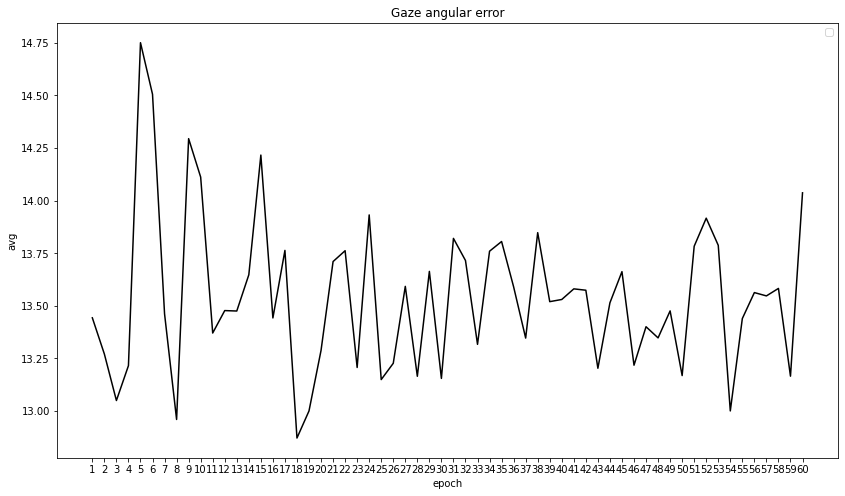

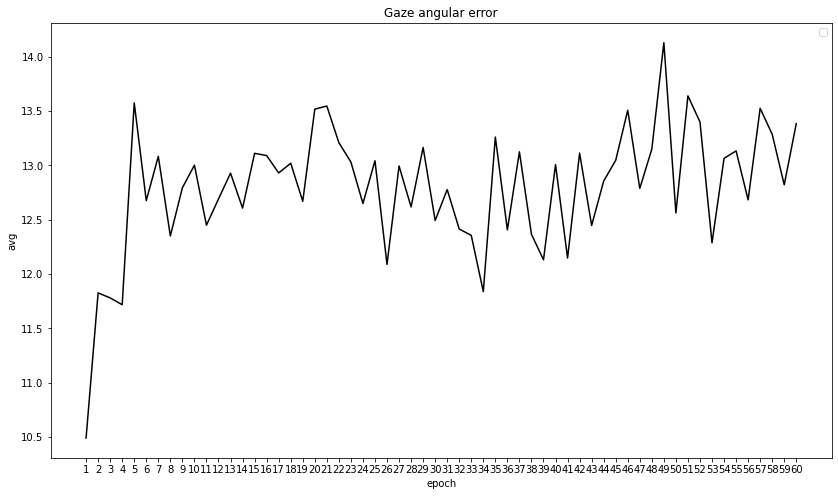

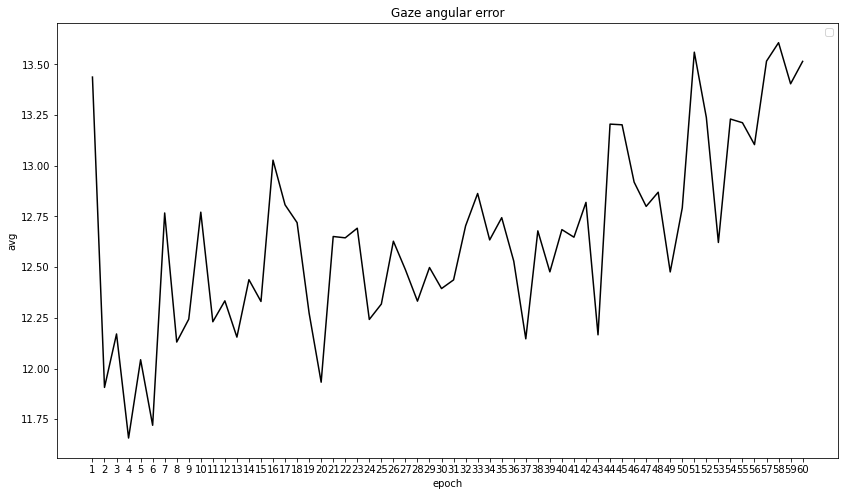

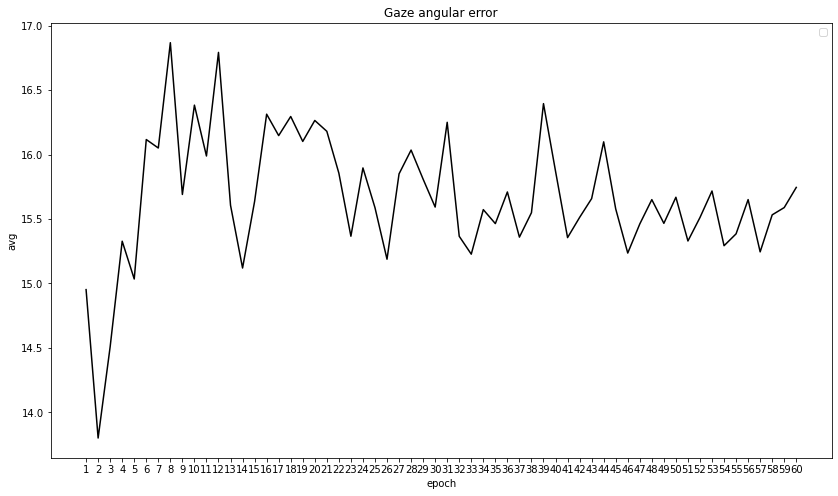

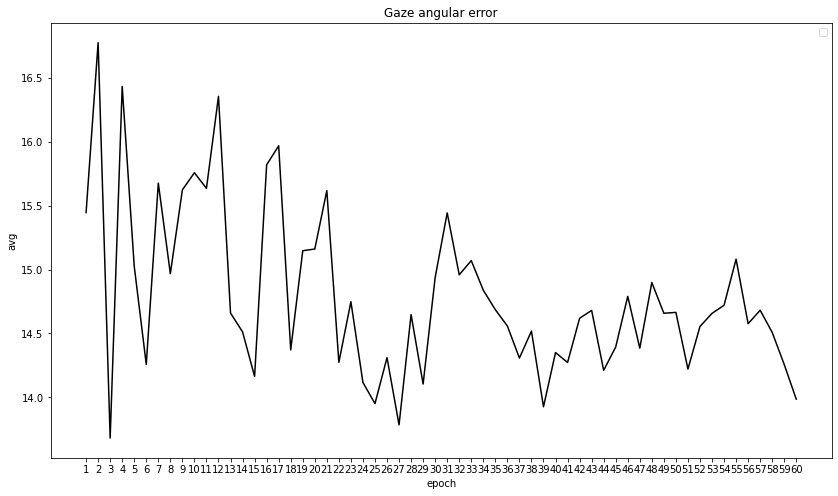

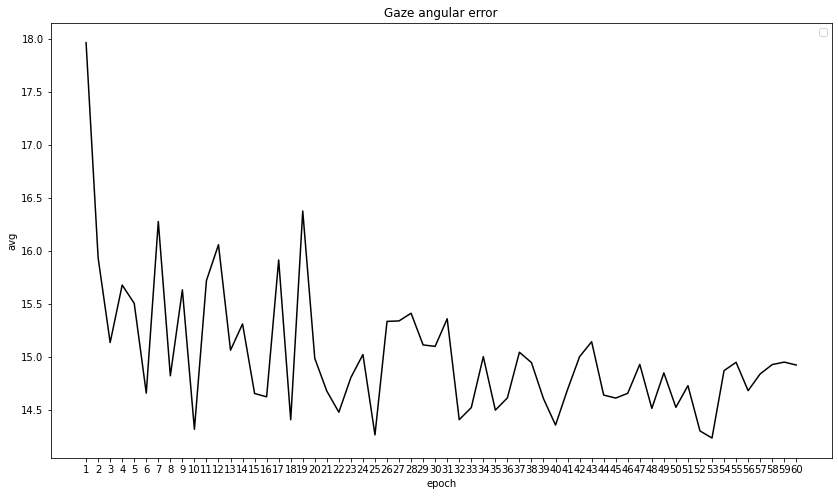

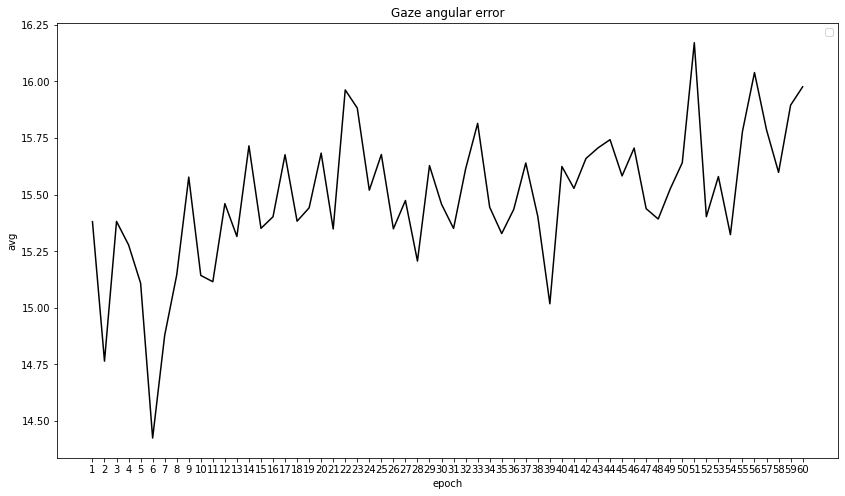

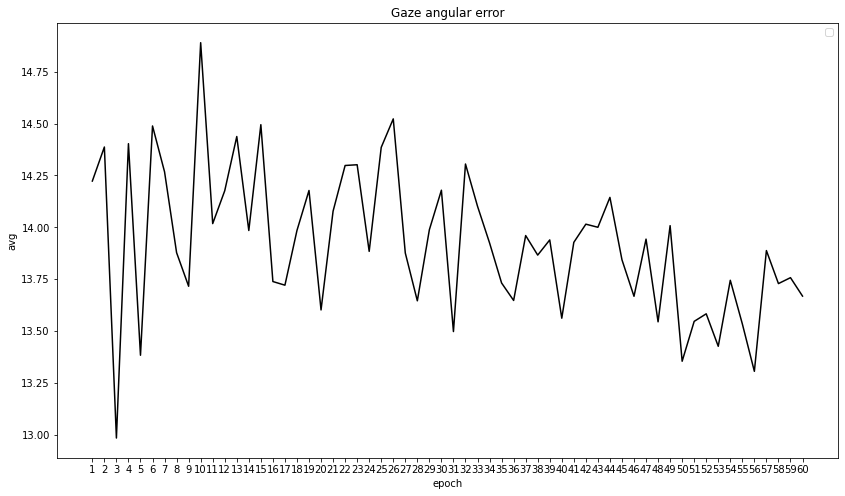

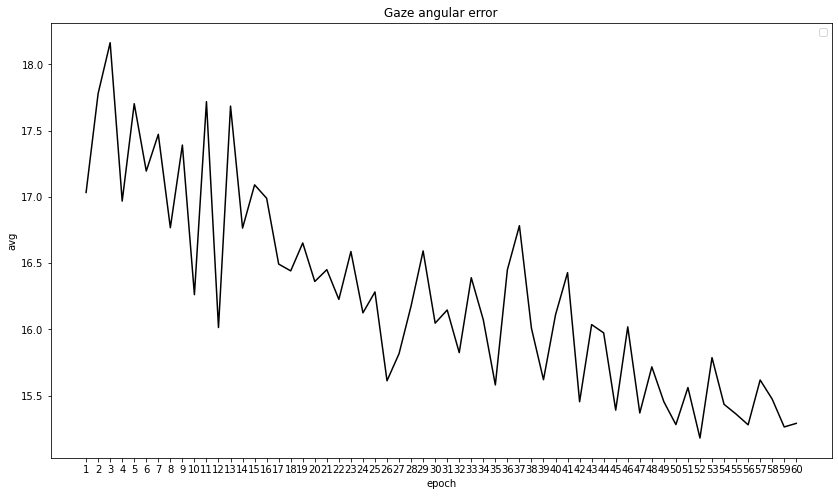

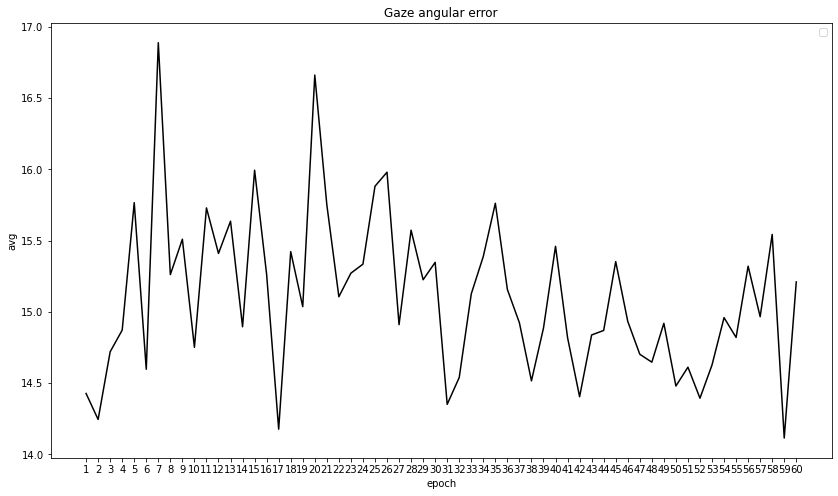

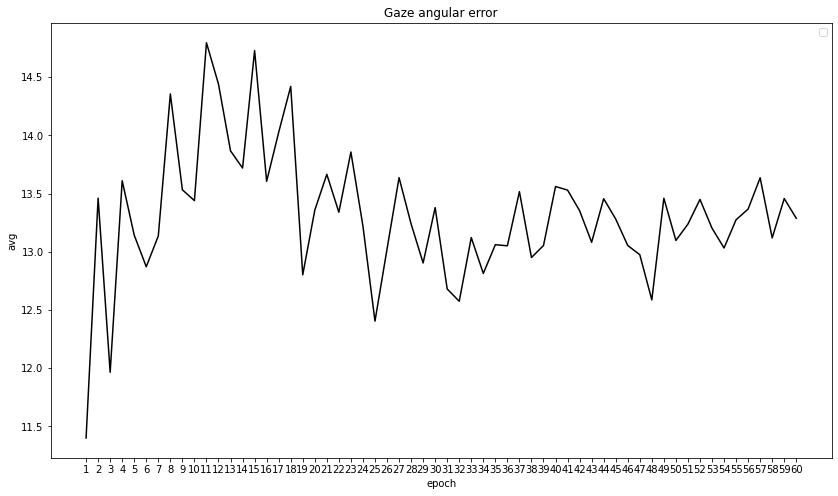

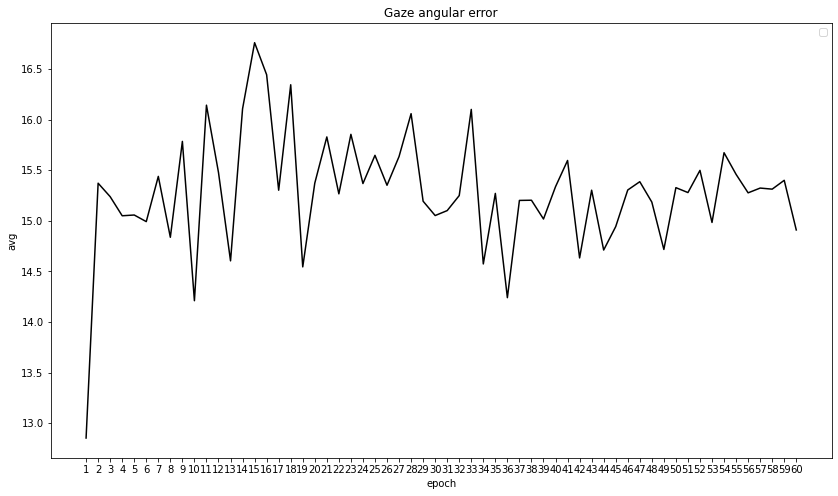

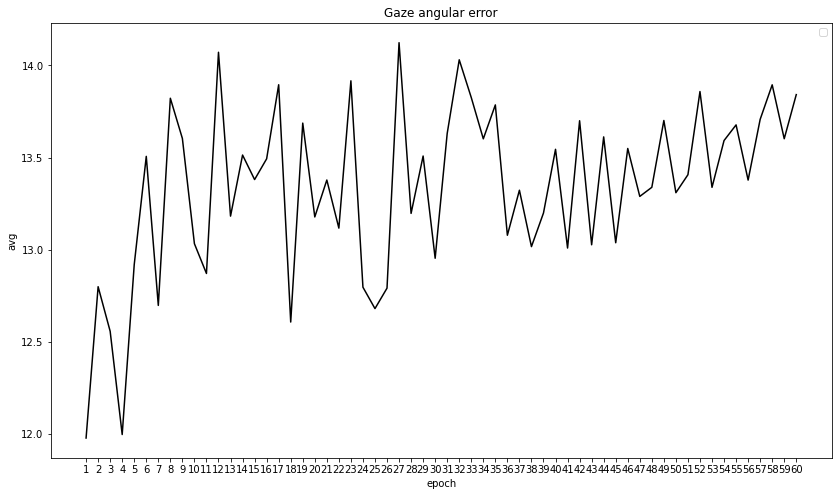

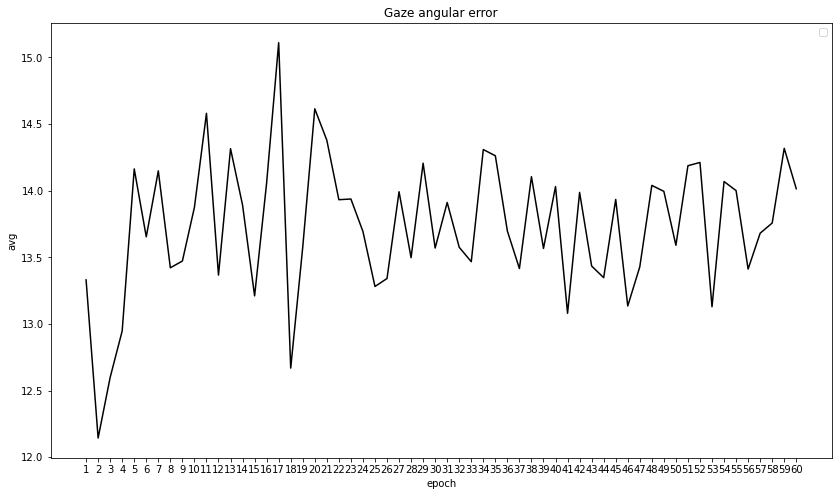

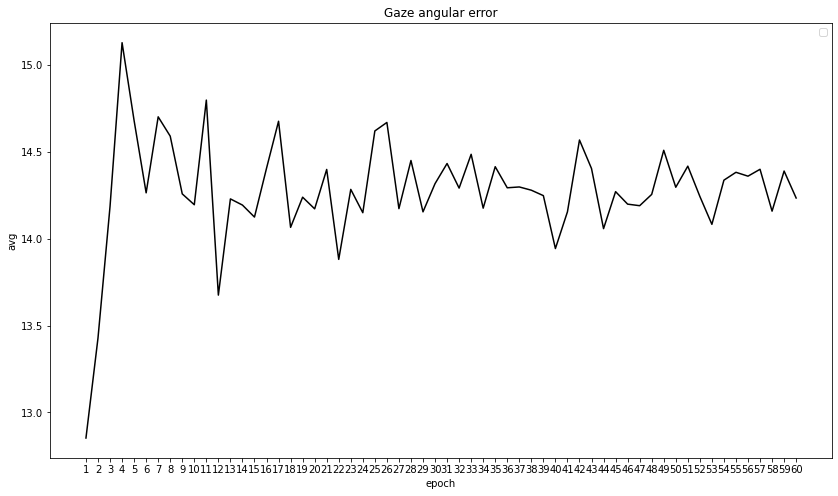

In [6]:
%%time
all_MAE = []
for fold in range(15):
#     print(f"fold={fold}")
    
    now = datetime.utcnow()
    now = now.astimezone(timezone('US/Pacific'))
    date_format='%m/%d/%Y %H:%M:%S'
    now = now.strftime(date_format)
    
    print(args.gazeMpiilabel_dir)
    folder = os.listdir(args.gazeMpiilabel_dir)
    folder.sort()  #individual label files
    testlabelpathcombined = [os.path.join(args.gazeMpiilabel_dir, j) for j in folder] 
    
    gaze_dataset=datasets.Mpiigaze(testlabelpathcombined, args.gazeMpiimage_dir, transformations, False, angle, fold)

    test_loader = torch.utils.data.DataLoader(
        dataset=gaze_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True)

    fold_path = os.path.join(evalpath, 'fold' + f'{fold:0>2}'+'/')  #for evaluation
#     print(f"fold_path is {fold_path}")
    if not os.path.exists(fold_path):
        os.makedirs(fold_path)

#     if not os.path.exists(os.path.join(evalpath, f"fold"+str(fold))):
#         os.makedirs(os.path.join(evalpath, f"fold"+str(fold)))

    # list all epochs for testing
    folder = os.listdir(os.path.join(snapshot_path, "fold" + f'{fold:0>2}'))
    folder.sort(key=natural_keys)
    folder.pop(-1)  #remove the tensorboard file, now all snapshot files
#     print(f"folder={folder}")
                    

    softmax = nn.Softmax(dim=1)
    with open(os.path.join(evalpath, os.path.join("fold"+f'{fold:0>2}', data_set+".log")), 'w') as outfile:
        
        configuration = (f"\ntest configuration equal gpu_id={gpu}, batch_size={batch_size}, model_arch={arch}\n"
                         f"Start testing dataset={data_set}, FOLD={fold} --{now}---------")
        print(configuration)
        
        outfile.write(configuration)
        epoch_list=[]
        avg_MAE=[]
        for epochs in folder: 
#             print(f"entering epochs={epochs}")
            model=model_used
            checkpoint = torch.load(os.path.join(snapshot_path+"fold"+f'{fold:0>2}', epochs))
            saved_state_dict = checkpoint['model_state_dict']
            model= nn.DataParallel(model,device_ids=[0])
            model.load_state_dict(saved_state_dict)
            model.cuda(gpu)
            model.eval()
            total = 0
            idx_tensor = [idx for idx in range(28)]
            idx_tensor = torch.FloatTensor(idx_tensor).cuda(gpu)
            avg_error = .0
            with torch.no_grad():
                for j, (images, labels, cont_labels, name) in enumerate(test_loader):
                    images = Variable(images).cuda(gpu)
                    total += cont_labels.size(0)

                    label_pitch = cont_labels[:,0].float()*np.pi/180
                    label_yaw = cont_labels[:,1].float()*np.pi/180

                    gaze_pitch, gaze_yaw = model(images)

                    # Binned predictions
                    _, pitch_bpred = torch.max(gaze_pitch.data, 1)
                    _, yaw_bpred = torch.max(gaze_yaw.data, 1)

                    # Continuous predictions
                    pitch_predicted = softmax(gaze_pitch)
                    yaw_predicted = softmax(gaze_yaw)

                    # mapping from binned (0 to 28) to angels (-42 to 42)                
                    pitch_predicted = \
                        torch.sum(pitch_predicted * idx_tensor, 1).cpu() * 3 - 42
                    yaw_predicted = \
                        torch.sum(yaw_predicted * idx_tensor, 1).cpu() * 3 - 42

                    pitch_predicted = pitch_predicted*np.pi/180
                    yaw_predicted = yaw_predicted*np.pi/180

                    for p,y,pl,yl in zip(pitch_predicted, yaw_predicted, label_pitch, label_yaw):
                        avg_error += angular(gazeto3d([p,y]), gazeto3d([pl,yl]))

            x = ''.join(filter(lambda i: i.isdigit(), epochs))
#             print(f"x={x}")
            epoch_list.append(x)
            avg_MAE.append(avg_error/total)  
#             print(f"total={total}")
            loger = f"[{epochs}---{args.dataset}] Total Num:{total},MAE:{avg_error/total}"
            outfile.write(loger)
            print(loger)
#             print(f"done epoch={epochs}")
    
    all_MAE.append(avg_MAE)
    fig = plt.figure(figsize=(14, 8))        
    plt.xlabel('epoch')
    plt.ylabel('avg')
    plt.title('Gaze angular error')
    plt.legend()
    plt.plot(epoch_list, avg_MAE, color='k', label='mae')
    fig.savefig(os.path.join(evalpath, os.path.join("fold"+f'{fold:0>2}', data_set+".png")), format='png')
    # plt.show() 

In [7]:
all_MAE=np.array(all_MAE)

In [8]:
print(all_MAE.shape)
print(all_MAE.mean(axis=0))
print(all_MAE.mean(axis=1))
print(all_MAE.mean(axis=0).argmin()+1 ,all_MAE.mean(axis=0).min())

(15, 60)
[13.9473853  14.126203   13.87433914 14.28519232 14.52355889 14.26139587
 14.72945146 14.41148128 14.60801652 14.40917053 14.74405136 14.65325237
 14.47691156 14.42773529 14.61609922 14.64737698 14.70699826 14.334394
 14.38151151 14.54305021 14.64379686 14.35646477 14.51588554 14.26299273
 14.21102988 14.22732462 14.37873842 14.34993861 14.38322332 14.26462839
 14.34578983 14.23769017 14.38559983 14.26303789 14.37663058 14.16341244
 14.29219136 14.21659022 14.10653457 14.33131341 14.1842404  14.29396433
 14.20821602 14.29566385 14.27507426 14.25929612 14.16543427 14.20869799
 14.35587412 14.11690768 14.37843969 14.31586639 14.09715964 14.28928493
 14.36563806 14.26610733 14.42358061 14.40175284 14.29199959 14.40120372]
[13.54032486 12.79606495 12.64664141 15.66323257 14.79028525 15.01235047
 15.48801002 13.92137504 16.25367168 15.10517126 13.31091957 15.27768232
 13.33578701 13.73437806 14.27780312]
3 13.87433914221293
